<a href="https://colab.research.google.com/github/henriquemin/portfolio_data_science/blob/master/_Titanic__Survival_Prediction_DS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction DS Project

## **Challenge**

*  This is the famous dataset to predict the survivals of the Titanic sinking.

*  Considered 'unsinkable' Titanic sank after colliding with an iceberg on April, 15, 1912.

*  As there weren't enough lifeboats to save everyone, it resulted in the death of some passengers and crew.

* Using this dataset I'm going to build a predictive model using LogisticRegression and SVC and preprocessing the dataset using sklearn models.

**Columns:**

['PassengerId'], ['Survived'], ['Pclass'], ['Name'], ['Sex'], ['Age'], ['SibSp'], ['Parch'], ['Ticket'], ['Fare'], ['Cabin'], ['Embarked']


## **Exploratory Data Analysis (EDA)**
---

Doing EDA will help to understand the dataset and which features to select to find the label of prediction


### Import Libraries







In [0]:
# Import the libraries to start the EDA procedure
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt

### Load file & Data preparation







In [0]:
# As I'm using the Google Colab, I selected the import files library from colab to select the dataset and upload it
from google.colab import files

uploaded = files.upload()
print(f'file uploaded!')

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv
file uploaded!


In [0]:
# Set up the initial dataframe and test dataframe by reading the .csv file
df_initial = pd.read_csv(io.BytesIO(uploaded['train.csv']), header=0)
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']), header=0)

In [0]:
#  Check if the dataset was loaded correctly and to visualize the data
df_initial.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



### Identifying Features & Labels

In [0]:
# Dataset info
display(df_initial.info())
print('\n')

# Descriptive statistics of the data
display(df_initial.describe())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing Value Identification

In [0]:
# Identify null values on dataset
# There are missing values on columns 'Age', 'Cabin' and 'Embarked'. It will be treated when necessary and in the ML algorithm

print('  ' * 10 + " Display information about column types and number of null values " + '  ' * 10 )
print('--' * 50)

tab_info = pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})
tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values'}))
tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.rename(index={0:'null values (%)'}))

if(any(df_initial.isnull().any())):
    print()
    display(tab_info)
else:
    print('NO missing data')

                     Display information about column types and number of null values                     
----------------------------------------------------------------------------------------------------



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
column type,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object
null values,0,0,0,0,0,177,0,0,0,0,687,2
null values (%),0,0,0,0,0,19.8653,0,0,0,0,77.1044,0.224467


In [0]:
# Check which statistical to fill null values:
age_cut = pd.cut(df_initial['Age'], bins= [0, 25, 50, 75, 100]).value_counts().sort_index()

mean = int(df_initial['Age'].mean())
median = int(df_initial['Age'].median())
print(age_cut)
print('\n')
print('The mean Age is {}' .format(mean))
print('The median Age is {}' .format(median))


(0, 25]      301
(25, 50]     349
(50, 75]      63
(75, 100]      1
Name: Age, dtype: int64


The mean Age is 29
The median Age is 28


### Exploring data attributes

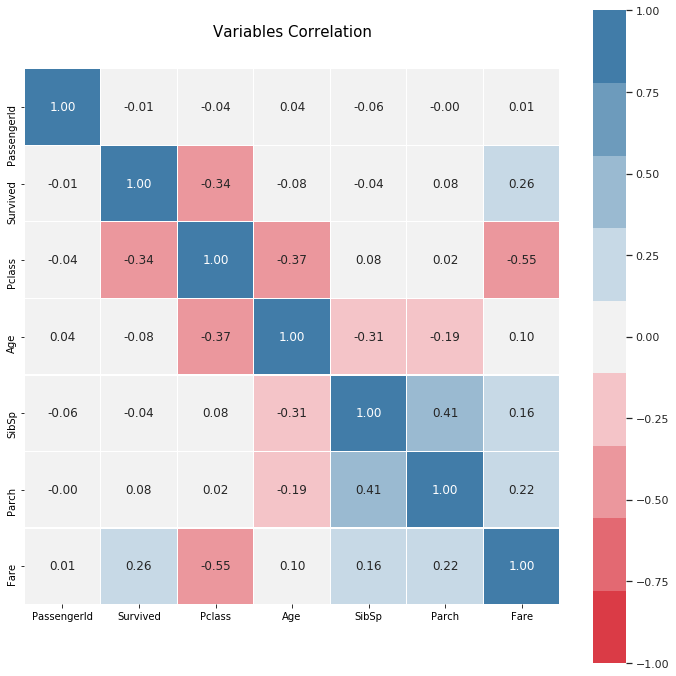

In [0]:
# Heatmap, to identify the correlation between the features. Obs: Correlation do not shows causation
corr = df_initial.corr()

#plt.title('Titanic - Features Correlation',  size=15)

#ax = sns.heatmap(corr, vmin= -1,  vmax = 1, linewidths=0.3, center = 0, cmap = sns.diverging_palette(10, 240, n=9), square = True, annot= True )

#ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')


plt.figure(figsize=(12,12))
plt.title('Variables Correlation', y=1.05, size=15)
sns.set(font_scale=1)

ax = sns.heatmap(corr, fmt= '.2f',linewidths=0.3, vmin= -1,vmax=1.0, square=True, cmap= sns.diverging_palette(10, 240, n=9), linecolor='white', annot=True);


In [0]:
# Check the % of women and men that survived on dataset
women = df_initial.loc[df_initial.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = df_initial.loc[df_initial.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print('% of women who survived: {0:.2f}%' .format(rate_women*100))
print('% of men who survived: {0:.2f}%' .format(rate_men*100))

% of women who survived: 74.20%
% of men who survived: 18.89%


### Pandas Profiling (Speedup EDA)


In [0]:
# pip install pandas-profiling
#!pip install --upgrade pandas_profiling
from pandas_profiling import ProfileReport

In [0]:
# Create the structure of the ProfilingReport
profile = ProfileReport(df_initial)
profile

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.7 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


## **Machine Learning Algorithm**
---

### Constants

In [0]:
# Defining constants will help to 
USE_COLS = ['Age', 'Sex', 'Pclass', 'Survived', "Fare"]
USE_COLS_1 = ['Age', 'Sex', 'Pclass', "Fare"]
TEST_SIZE = 0.2         # train_test_split, definition of test size
RANDOM_SEED = 42        # train_test_split, log_reg, svc, kfold
STRATEGY_NUM = 'median'   # imput_missing_num
STRATEGY_CAT = 'most_frequent'  # imput_missing_cat
N_SPLITS = 10           # kfold
SCORING = 'accuracy'    # cross-validation model

### Preparing the dataset to Machine Learning

In [0]:
# Read the titanic_historic dataset, using the USE_COLS feature
titanic_historic = pd.read_csv(io.BytesIO(uploaded['train.csv']), header=0, usecols= USE_COLS)

In [0]:
titanic_historic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


### Train_Test_Split of the dataset
It will separate the data between Train and Test datasets





In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Features and labels selection
X = titanic_historic.drop(columns='Survived')   # Select all columns, except 'Survived'
y = titanic_historic.loc[:, 'Survived']         # Select [all rows, column 'Survived'] 


In [0]:
# Separate the data between _train and _test data, considering the test_size according to Constant variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE , random_state = RANDOM_SEED)

print("{0:0.2f}% on train data" .format((len(X_train) / len(titanic_historic.index)) * 100))
print("{0:0.2f}% on test data" .format((len(X_test) / len(titanic_historic.index)) * 100))

79.91% on train data
20.09% on test data


## Defining the transformers, preprocessor , estimators, kfold and pipelines






In [0]:
# Import the libraries
from sklearn.pipeline import Pipeline                            # Reduce dimensionality of the features and then use a estimator
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # SS: Standardize features of the dataset into a standard normal distribution / OHE: change the str value into int(0,1,2,..)
from sklearn.impute import SimpleImputer                         # Fill the missing values, selecting the imputation strategy (std=mean, median, most_frequent, constant)
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [0]:
# numerical transformers
cols_num = ['Age', 'Fare']                                          # selecting the column that has num values
imput_missing_num = SimpleImputer(strategy = STRATEGY_NUM)  # if missing value, it will imput the strategy selected
scaler_num = StandardScaler()                               # Standardize features of the dataset into a standard normal distribution
pipe_num = Pipeline([                                       # instantiate a numerical pipeline to do the num_pre_processing step as a tuple
                     ('Imput_Missing_Num', imput_missing_num),
                     ('Scaler_num', scaler_num)
                    ])

In [0]:
# categorical transformers
cols_cat = ['Sex']                                                  # selecting the column that has str/obj values
imput_missing_cat = SimpleImputer(strategy = STRATEGY_CAT)          # if miss_value, will place the most frequent value, but not necessary is the ideal. Must check with the team the best imput
one_hot_cat = OneHotEncoder(handle_unknown='error', drop='first')   # it will transform the categorical values into a binary vector
pipe_cat = Pipeline([                                               # instantiate a categorical pipeline to do the categorical_pre_processing step as a tuple
                     ('Imput_Missing_Cat', imput_missing_cat),
                     ('One_Hot_Cat', one_hot_cat)
                    ])



In [0]:
# define a preprocessor: it will join both numerical and categorical transformer and execute both inside the preprocessor and it will change the values of the columns
preprocessor = ColumnTransformer([
                                  ('Trans_num', pipe_num, cols_num),
                                  ('Trans_cat', pipe_cat, cols_cat)
                                 ], remainder = 'passthrough')

print('\n\n')
print(X_train)
print(preprocessor.fit_transform(X_train))

# Below will show the result of columns. See that 'Sex' column became (0,1) binary values.




     Pclass     Sex   Age      Fare
331       1    male  45.5   28.5000
733       2    male  23.0   13.0000
382       3    male  32.0    7.9250
704       3    male  26.0    7.8542
813       3  female   6.0   31.2750
..      ...     ...   ...       ...
106       3  female  21.0    7.6500
270       1    male   NaN   31.0000
860       3    male  41.0   14.1083
435       1  female  14.0  120.0000
102       1    male  21.0   77.2875

[712 rows x 4 columns]
[[ 1.25364106 -0.07868358  1.          1.        ]
 [-0.47728355 -0.37714494  1.          2.        ]
 [ 0.21508629 -0.47486697  1.          3.        ]
 ...
 [ 0.90745614 -0.35580399  1.          3.        ]
 [-1.1696534   1.68320121  0.          1.        ]
 [-0.63114352  0.86074761  1.          1.        ]]


In [0]:
# import libraries to machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score       # Cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# defining the machine learning models
log_reg = LogisticRegression(random_state = RANDOM_SEED)
svc = SVC(random_state = RANDOM_SEED)
decision_tree = DecisionTreeClassifier(max_depth = 5, random_state = RANDOM_SEED)

# defining the cross-validation model (Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.)
kfold= KFold(n_splits = N_SPLITS, shuffle = True, random_state = RANDOM_SEED)   # splits the data into n groups, shuffle randomnly the data

## Hyperparameters






In [0]:
# criando o modelo usando pipeline
model_3 = Pipeline(steps=[
    ('Preprocessor', preprocessor),
    ('tree', decision_tree)
])

# Tunando hiperparâmetros com 5-fold cross-validation e pipelines
parameters = {'tree__max_depth': [3,4,5,7,10]}           
grid = GridSearchCV(model_3, param_grid=parameters, cv=kfold, n_jobs=-1)
grid.fit(X_train, y_train)

# qual o melhor parâmetro
grid.best_params_ 

{'tree__max_depth': 5}

## Evaluation of the model






In [0]:
# cross-validation
tuple_models = (('Log_reg', log_reg), ('SVC', svc), ('Tree', decision_tree))

for name, model in tuple_models:
  pipe = Pipeline([('Preprocessor', preprocessor), ('Model', model)])           #Pipeline to transform cols_num and cols_cat then join inside a estimator
  scores = cross_val_score(pipe, X_train, y_train, cv = kfold, scoring=SCORING)

  print('\n===========================================================')
  print(f'EVALUATING THE MODEL {name}, WITH CROSS-VAL {N_SPLITS} FOLDS')
  print(f'MEAN: {scores.mean()*100:.2f}%')
  print(f'STD DEVIATION: {scores.std()*100:.2f}%')

  print('-----------------------------------------------------------')
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  print(f'EVALUATING THE MODEL ON TEST DATA: {accuracy_score(y_test,y_pred)*100:.2f}%')



EVALUATING THE MODEL Log_reg, WITH CROSS-VAL 10 FOLDS
MEAN: 78.93%
STD DEVIATION: 4.71%
-----------------------------------------------------------
EVALUATING THE MODEL ON TEST DATA: 79.89%

EVALUATING THE MODEL SVC, WITH CROSS-VAL 10 FOLDS
MEAN: 79.91%
STD DEVIATION: 4.06%
-----------------------------------------------------------
EVALUATING THE MODEL ON TEST DATA: 79.33%

EVALUATING THE MODEL Tree, WITH CROSS-VAL 10 FOLDS
MEAN: 81.45%
STD DEVIATION: 4.01%
-----------------------------------------------------------
EVALUATING THE MODEL ON TEST DATA: 80.45%


## **Selecting the model and do Predictions**









In [0]:
import pickle

In [0]:
# Save the model that will use in prediction
#predict_file = 'log_reg.sav'
#pickle.dump(log_reg, open(predict_file, 'wb'))

predict_file_tree = 'decision_tree.sav'
pickle.dump(decision_tree, open(predict_file_tree, 'wb'))

In [0]:
# Load test dataset and do the preprocessing
titanic_test = pd.read_csv(io.BytesIO(uploaded['test.csv']), header=0, usecols= USE_COLS_1)
titanic_proc = preprocessor.fit_transform(titanic_test)

In [0]:
# Load the model to do predictions with new dataset
#load_model = pickle.load(open(predict_file, 'rb'))
load_model = pickle.load(open(predict_file_tree, 'rb'))

In [0]:
# Predictions
predictions = load_model.predict(titanic_proc)

In [0]:
# Save the results
submission = pd.DataFrame(predictions)
submission['PassengerId'] = df_test['PassengerId']
submission['Survived'] = predictions
submission.to_csv('submission.csv', index=False)